# Integrating CyberGIS and Urban Sensing for Reproducible Streaming Analytics

This Jupyter notebook demostrates the book chapter named Integrating CyberGIS and Urban Sensing for Reproducible Streaming Analytics, including showing the locations for AoT sensors and the temperature curve for AoT nodes in Chicago.

We are using Chicago, IL, US as our study area. And this notebook uses geospatial libraries to show the deployment of AoT Nodes, spatial distrinution for AoT nodes in Chicago, and Temperature trends in Chiacago for one week.

# Notebook Outline
- [Data preparing](#Data)
    - [Setup](#setup)
    - [AoT Data](#AOT)
    - [Boundary and Street data](#SHP)
- [Exploratory Analysis](#explore)
    - [Deployment of AoT Nodes](#deploy)
    - [Spatial distrinution for AoT nodes in Chicago](#spatial)
    - [Temperature trends in Chiacago for one week](#statistical)

<a id='Data'></a>
## Data Preparation

The first part is a demostration that shows user how to prepare AoT Data，boundary data, and street data in Chicago.

<a id='setup'></a>
### Set up the environment by importing libraries
Import numpy, pandas, geopandas, shapely and other libraries available in CyberGIS-Jupyter to set up an environment to store and manipulate the AoT data.

In [1]:
import pathlib
import os
import tarfile

#show Chicago GTFS data
import requests
import shutil
import zipfile

# using pandas to 
import pandas as pd

# Plotting the deployment of AoT nodes in Chicago
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

import numpy as np
import geopandas as gpd
from shapely.geometry import Point


<a id='AOT'></a>
### AoT data for Chicago


Download the AoT data for Chicago in one week (between Sep 30th to Oct 6th in 2019.)

The AoT data was downloaded from https://api.arrayofthings.org/.
The boundary data and street data were generated from https://www.openstreetmap.org/.


In [2]:
file = pathlib.Path("chicago-complete.weekly.2019-09-30-to-2019-10-06.tar")
if file.exists ():
    print ("AoT data exist")
else:
    print ("AoT data not exist, Downloading the AoT data...")
    #!wget https://s3.amazonaws.com/aot-tarballs/chicago-complete.weekly.2019-09-30-to-2019-10-06.tar
    !wget https://www.hydroshare.org/resource/f184c03de5df442aa5a2ec01fa3252f7/data/contents/chicago-complete.weekly.2019-09-30-to-2019-10-06.tar
    

AoT data not exist, Downloading the AoT data...
--2020-03-10 21:59:13--  https://www.hydroshare.org/resource/f184c03de5df442aa5a2ec01fa3252f7/data/contents/chicago-complete.weekly.2019-09-30-to-2019-10-06.tar
Resolving www.hydroshare.org (www.hydroshare.org)... 152.54.2.89
Connecting to www.hydroshare.org (www.hydroshare.org)|152.54.2.89|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /resource/f184c03de5df442aa5a2ec01fa3252f7/data/contents/chicago-complete.weekly.2019-09-30-to-2019-10-06.tar/ [following]
--2020-03-10 21:59:13--  https://www.hydroshare.org/resource/f184c03de5df442aa5a2ec01fa3252f7/data/contents/chicago-complete.weekly.2019-09-30-to-2019-10-06.tar/
Reusing existing connection to www.hydroshare.org:443.
HTTP request sent, awaiting response... 302 Found
Location: /django_irods/download/f184c03de5df442aa5a2ec01fa3252f7/data/contents/chicago-complete.weekly.2019-09-30-to-2019-10-06.tar/?url_download=False&zipped=False&aggregation=F

Create data directory if the directory not exist

In [3]:
if not os.path.exists('./data'):
    print ("Directory not exist, create directory")
    os.mkdir('./data')
else:
    print ("Directory exist")

Directory not exist, create directory


Extract the weekly chicago AoT data into data directory

In [4]:
file_tar = tarfile.open('chicago-complete.weekly.2019-09-30-to-2019-10-06.tar')
#specify which folder to extract
file_tar.extractall('./data') 
file_tar.close()

Define the file path for the data

In [5]:
fn = './data/chicago-complete.weekly.2019-09-30-to-2019-10-06/data.csv.gz'
#print(os.path.isfile(fn))

Define the data directory

In [6]:
# data path
AoT_Data_Directory = './data/chicago-complete.weekly.2019-09-30-to-2019-10-06/'

<a id='SHP'></a>
### Boundary and Street data for Chicago


Download the boundary and street data for Chicago

In [7]:
shpfile = pathlib.Path("shp.zip")
if shpfile.exists ():
    print ("Shp Data exist")
else:
    print ("Shp Data not exist, Downloading the data...")
    !wget https://www.hydroshare.org/resource/f184c03de5df442aa5a2ec01fa3252f7/data/contents/shp.zip

with zipfile.ZipFile('shp.zip', 'r') as file:
    file.extractall('./data')

Shp Data not exist, Downloading the data...
--2020-03-10 22:03:32--  https://www.hydroshare.org/resource/f184c03de5df442aa5a2ec01fa3252f7/data/contents/shp.zip
Resolving www.hydroshare.org (www.hydroshare.org)... 152.54.2.89
Connecting to www.hydroshare.org (www.hydroshare.org)|152.54.2.89|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /resource/f184c03de5df442aa5a2ec01fa3252f7/data/contents/shp.zip/ [following]
--2020-03-10 22:03:32--  https://www.hydroshare.org/resource/f184c03de5df442aa5a2ec01fa3252f7/data/contents/shp.zip/
Reusing existing connection to www.hydroshare.org:443.
HTTP request sent, awaiting response... 302 Found
Location: /django_irods/download/f184c03de5df442aa5a2ec01fa3252f7/data/contents/shp.zip/?url_download=False&zipped=False&aggregation=False [following]
--2020-03-10 22:03:32--  https://www.hydroshare.org/django_irods/download/f184c03de5df442aa5a2ec01fa3252f7/data/contents/shp.zip/?url_download=False&zipped=False&aggre

read sensor information from nodes.csv where values are seperated by "," and display the first 15 rows of data

In [8]:
nodes = pd.read_csv(AoT_Data_Directory + 'nodes.csv', sep=",")

# the first 15 rows of data is displayed below
nodes.head(15)

,node_id,project_id,vsn,address,lat,lon,description,start_timestamp,end_timestamp
0,001e0610ba46,AoT_Chicago,004,State St & Jackson Blvd Chicago IL,41.878377,-87.627678,AoT Chicago (S) [C],2017/10/09 00:00:00,NaN
1,001e0610ba3b,AoT_Chicago,006,18th St & Lake Shore Dr Chicago IL,41.858136,-87.616055,AoT Chicago (S),2017/08/08 00:00:00,NaN
2,001e0610f02f,AoT_Chicago,00A,Lake Shore Drive & Fullerton Ave Chicago IL,41.926261,-87.630758,AoT Chicago (S) [CA],2018/05/07 00:00:00,NaN
3,001e0610ba8f,AoT_Chicago,00D,Cornell & 47th St Chicago IL,41.810342,-87.590228,AoT Chicago (S),2017/08/08 00:00:00,NaN
4,001e0610ba16,AoT_Chicago,010,Homan Ave & Roosevelt Rd Chicago IL,41.866349,-87.710543,AoT Chicago (S) [C],2018/07/18 00:00:00,NaN
5,001e06107e5d,AoT_Chicago,014,State St & Washington St Chicago IL,41.883205,-87.627769,AoT Chicago (T),2016/09/14 00:00:00,NaN
6,001e0610ba8b,AoT_Chicago,018,Stony Island Ave & 63rd St Chicago IL,41.780600,-87.586456,AoT Chicago (S) [C],2018/02/26 00:00:00,NaN
7,001e0610ba13,AoT_Chicago,01C,7801 S Lawndale Ave Chicago IL,41.751238,-87.712990,AoT Chicago (S) [C] {ComEd},2018/01/01 00:00:00,NaN
8,001e0610ba18,AoT_Chicago,01D,Damen Ave & Cermak Chicago IL,41.852179,-87.675825,AoT Chicago (S),2017/12/15 00:00:00,NaN
9,001e0610bc10,AoT_Chicago,01F,State St & 87th Chicago IL,41.736314,-87.624179,AoT Chicago (S) [C],2018/02/22 00:00:00,NaN


Show the statistical number of the AoT Sensors

In [9]:
nodes.shape

(126, 9)

<a id='explore'></a>

## Exploratory Analysis

The part is a demostration that shows  Deployment of AoT Nodes, spatial distrinution for AoT nodes in Chicago, and Temperature trends in Chiacago for one week.

<a id='deploy'></a>
### Deployment of AoT Nodes in Chicago

Show the Deployment of AoT Nodes of Chicago in each month

Text(0, 0.5, 'Number of Nodes')

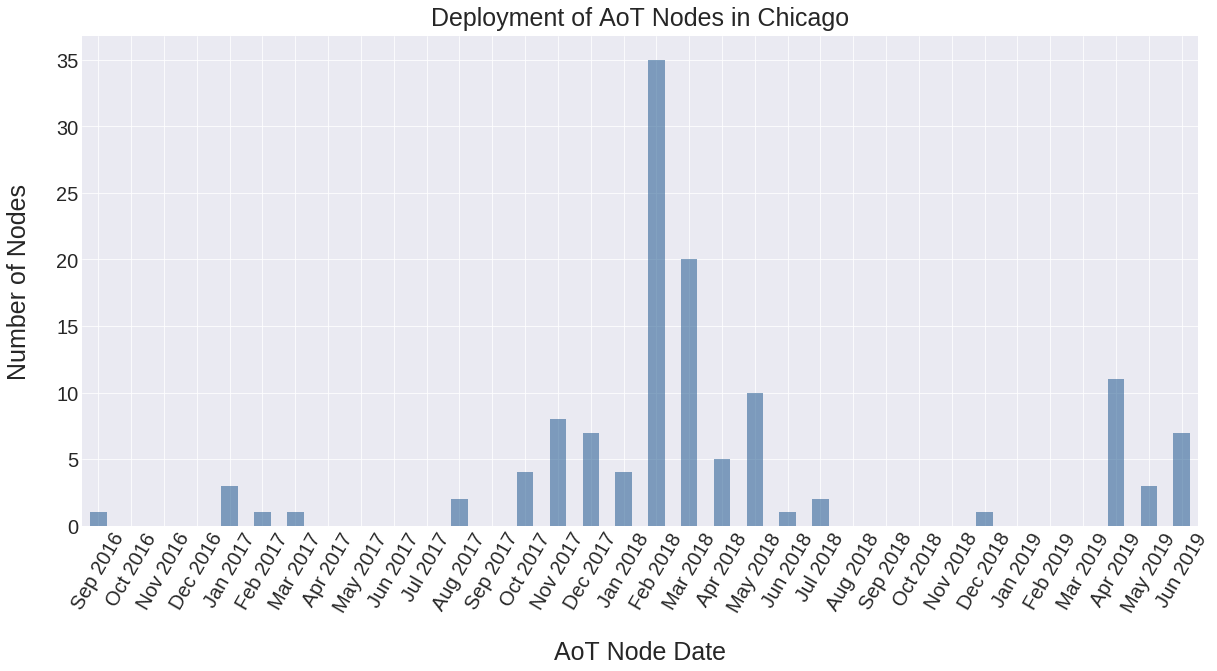

In [10]:
# Convert that column into a datetime datatype
nodes['start_timestamp'] = pd.to_datetime(nodes['start_timestamp'])
# Set the datetime column as the index
nodes.index = nodes['start_timestamp'] 

# Count up the number of nodes deployed in each month
nodecount = nodes['node_id'].resample('M').count()

plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()
nodecount.plot(kind='bar', ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6))

f = lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').strftime('%b %Y')
ax.set_xticklabels([ f(x.get_text()) for x in ax.get_xticklabels()])
plt.xticks(fontsize = 20, rotation=60)
plt.yticks(fontsize = 20)

# Set title and labels
ax.set_title('Deployment of AoT Nodes in Chicago',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('AoT Node Date',fontsize = 25, labelpad=25)
ax.set_ylabel('Number of Nodes',fontsize = 25, labelpad=25)

Show the Deployment of AoT Nodes in Chicago using cumulative value

Text(0, 0.5, 'Number of Nodes')

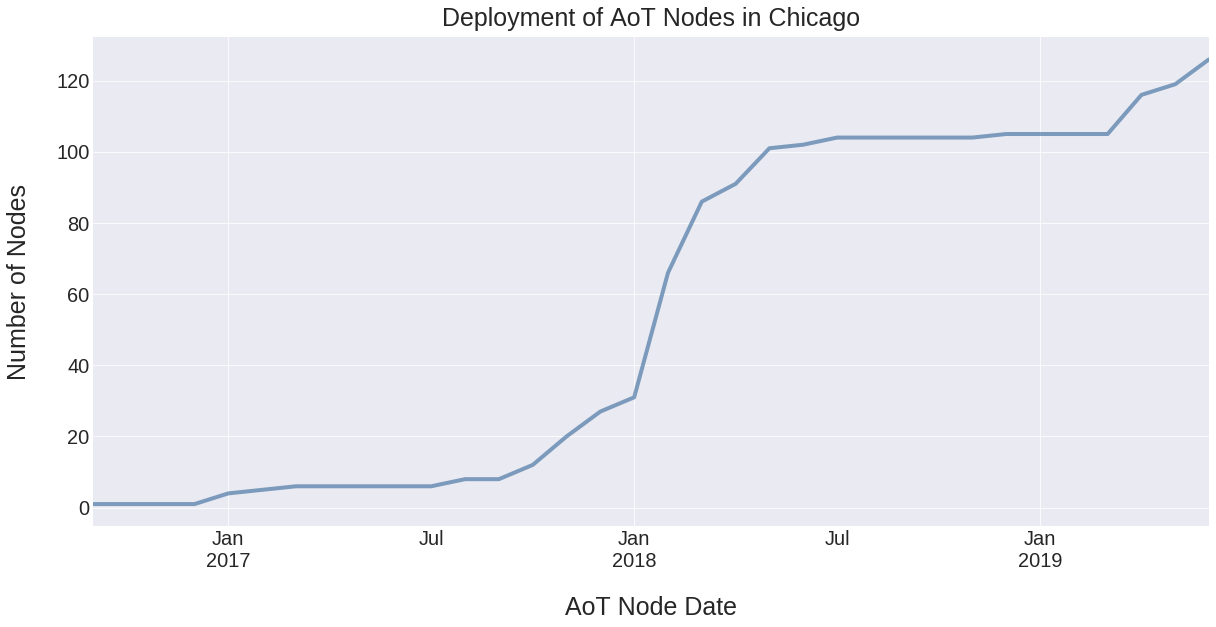

In [11]:
nodes['start_timestamp'] = pd.to_datetime(nodes['start_timestamp'])
nodes.index = nodes['start_timestamp'] 

nodecount = nodes['node_id'].resample('M').count()

plt.style.use('seaborn-darkgrid')

fig, ax = plt.subplots()
nodecount.sort_index().cumsum().plot(ax = ax, figsize=[20,9], color=(0.2, 0.4, 0.6, 0.6), linewidth=4)

plt.tick_params(axis='both', which='both', labelsize=20)

ax.set_title('Deployment of AoT Nodes in Chicago',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('AoT Node Date',fontsize = 25, labelpad=25)
ax.set_ylabel('Number of Nodes',fontsize = 25, labelpad=25)

<a id='spatial'></a>
### Spatial distrinution for AoT nodes in Chicago

Setting global variables for shapefiles for Chicago street and region

In [12]:
#
Chicago_Streets_Shapefiles = './data/shp/street-chicago.shp'
Chicago_Boundary_Shapefile = './data/shp/il-chicago.shp'

Show the sensor data in Chicago,  red nodes are active and blue nodes are no longer reporting data 

Text(0.5, 1, 'Spatial distribution for AoT nodes in Chicago')

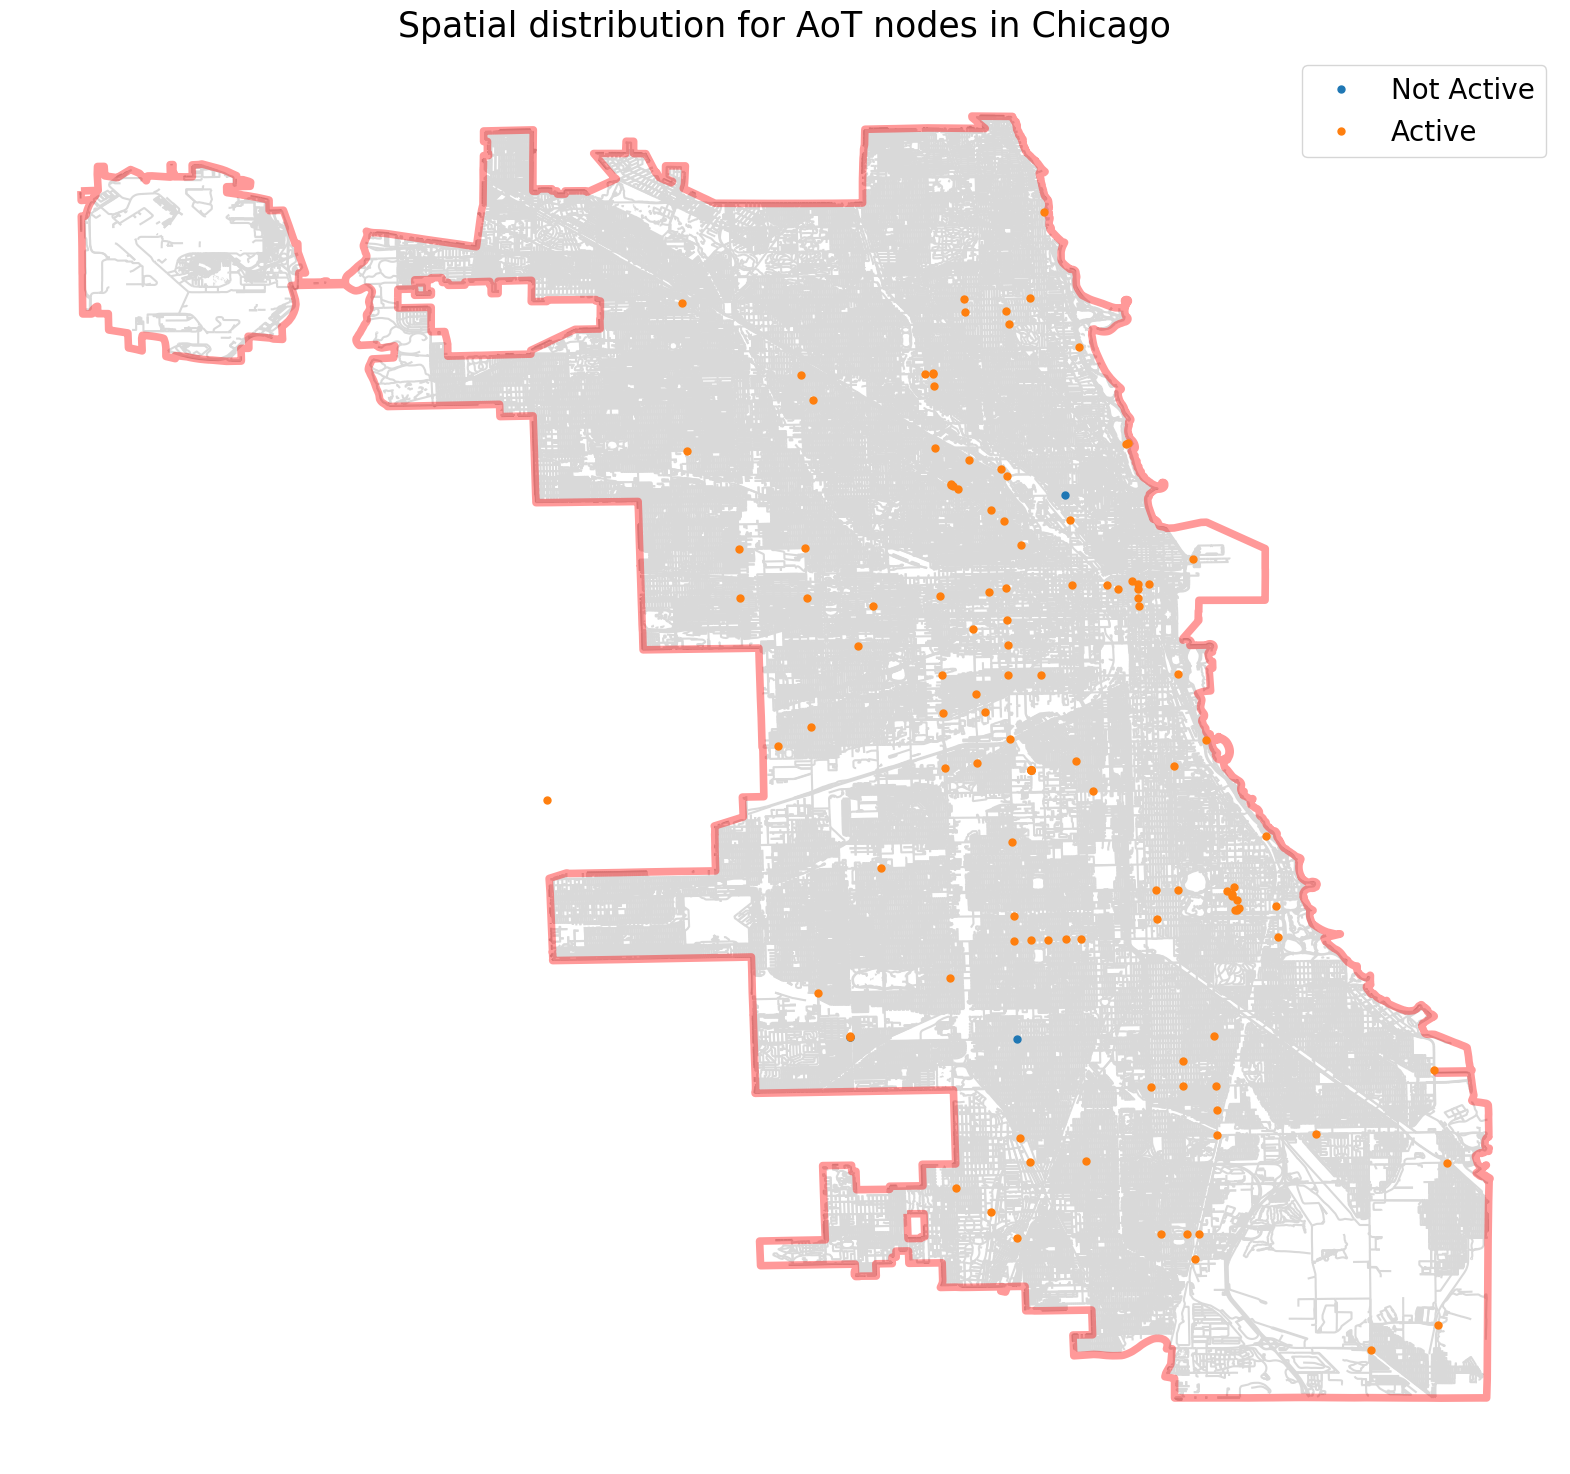

In [13]:

node_locations = pd.DataFrame()
# Pull the longitude and latitude information from the "nodes" dataframe
# Use zip to create set of lon, lat tuples then put into a list
node_locations['Coordinates'] = list(zip(nodes.lon, nodes.lat))

node_locations['Coordinates'] = node_locations['Coordinates'].apply(Point)

node_locationsDF = gpd.GeoDataFrame(node_locations, geometry='Coordinates')

# create a new column in the nodes dataframe called status, if the end timestamp is NaN then r is placed in 
# the column otherwise a b is placed in column - this translates to red nodes are active and blue nodes
# are no longer reporting data
nodes['status'] = np.where(nodes['end_timestamp'].isnull(), 'r', 'b')

plt.style.use('default')

# This reads in a shapefile
streetmap = gpd.read_file(Chicago_Streets_Shapefiles)

f, ax = plt.subplots(1, figsize=(20, 20))

# Plots the Chicago streets
streetmap.plot(ax=ax, color='silver', zorder = 0)

boundary = gpd.read_file(Chicago_Boundary_Shapefile)
# Plots the boundary of Chicago 
#boundary.plot(ax = ax, alpha = 0.1, linewidth = 1.0, edgecolor = 'red', zorder = 5)
boundary.plot(ax=ax, color='white', alpha = 0.4, linewidth=5.5, edgecolor='red', zorder = 5)

# Plot locations on the map as a new layer - zorder ensures the nodes are on top and
for node_status, node in nodes.groupby('status'):
    ax.plot(node['lon'], node['lat'], marker='o', linestyle='', ms=5, label=node_status, zorder = 10)

ax.legend(['Not Active','Active'],fontsize=20)

ax.set_axis_off()
ax.set_title('Spatial distribution for AoT nodes in Chicago', fontsize = 25, fontdict = {'verticalalignment':'bottom'})

<a id='statistical'></a>
### Temperature trends in Chiacago for one week

Load one week data (about 50 seconds) and show the first 10 rows of data.

In [14]:
#load full dataset (time the loading via %time)
#about 50 seconds
%time weekdata  = pd.read_csv(fn, compression='gzip')
#%time weekdata = pd.read_csv(AoT_Data_Directory + 'data.csv',sep=",")
weekdata.head(10)

CPU times: user 57.2 s, sys: 2.59 s, total: 59.8 s
Wall time: 59.8 s


,timestamp,node_id,subsystem,sensor,parameter,value_raw,value_hrf
0,2019/09/30 00:00:00,001e061183f5,ep,device,bcam,0,0
1,2019/09/30 00:00:00,001e061183f5,ep,device,lan,1,1
2,2019/09/30 00:00:00,001e061183f5,ep,device,tcam,1,1
3,2019/09/30 00:00:00,001e061183f5,ep,disk_size,boot,134582272,134582272
4,2019/09/30 00:00:00,001e061183f5,ep,disk_size,root,7672598528,7672598528
5,2019/09/30 00:00:00,001e061183f5,ep,disk_size,rw,7447728128,7447728128
6,2019/09/30 00:00:00,001e061183f5,ep,disk_used,boot,14217216,14217216
7,2019/09/30 00:00:00,001e061183f5,ep,disk_used,root,2211491840,2211491840
8,2019/09/30 00:00:00,001e061183f5,ep,disk_used,rw,6205472768,6205472768
9,2019/09/30 00:00:00,001e061183f5,ep,disk_used_ratio,boot,0.106,0.106


Converts the timestamp type to datetime and convert the temperature values into floats

In [15]:
%time temperature = weekdata[weekdata['parameter'] == 'temperature'].copy()
# Convert that column into a datetime datatype
temperature['timestamp'] = pd.to_datetime(temperature['timestamp'])

# Converts the timestamp type to datetime
temperature.timestamp = pd.to_datetime(temperature.timestamp)

# Convert the temperature values into floats so they can be plotted
%time temperature.value_hrf = pd.to_numeric(temperature['value_hrf'], errors='coerce').fillna(0)
temperature.index = temperature['timestamp']

CPU times: user 4.08 s, sys: 27.9 ms, total: 4.11 s
Wall time: 4.05 s
CPU times: user 2.96 s, sys: 9.05 ms, total: 2.97 s
Wall time: 2.96 s


Show the temperature trends in Chiacago for one week using "°C"

Text(0.5, 0, 'Week of Data')

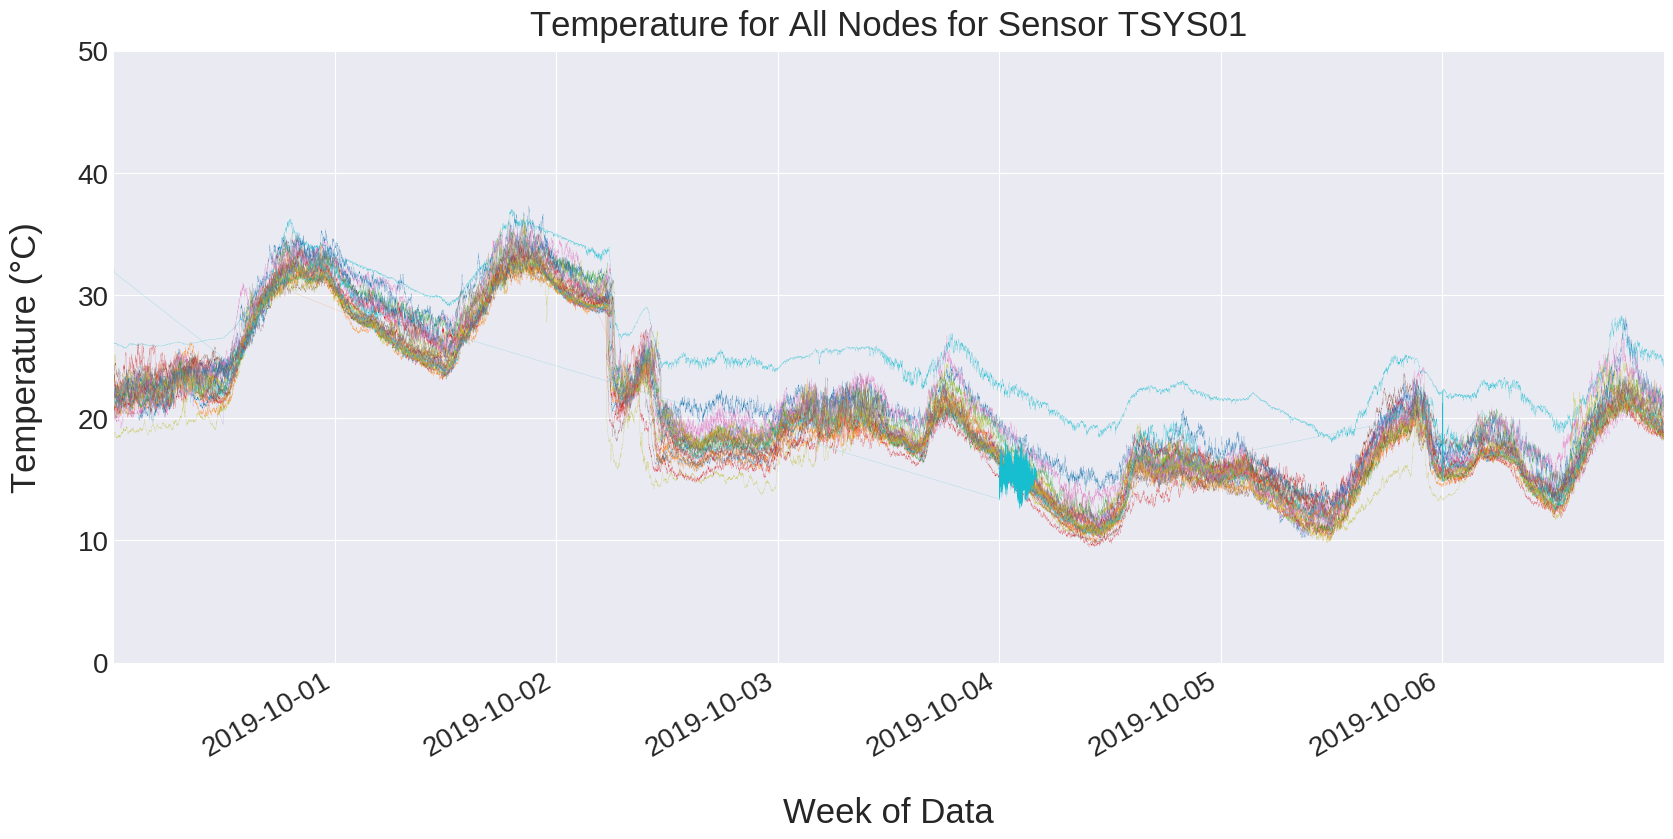

In [16]:
TSYS01 = temperature[temperature['sensor'] == 'tsys01']
TSYS01.index = TSYS01['timestamp']

del TSYS01['timestamp']

# Set the graphing style
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()

plt.xticks(fontsize = 20, rotation=60)
plt.yticks(fontsize = 20)

 
ax.set_ylim(0, 50)

# Set title and labels
#Temperature for All Nodes in Chicago within one week
ax.set_title('Temperature for All Nodes for Sensor TSYS01',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_ylabel('Temperature (°C)',fontsize = 25, labelpad=25)


for nodeId, t in TSYS01.groupby('node_id'):
    t['value_hrf'].plot(ax = ax, figsize=[20,9], linewidth=0.1)
    
ax.set_xlabel('Week of Data', fontsize = 25, labelpad=25)

Convert celsius to fahrenheit

In [17]:
# function for converting celsius to fahrenheit
def celsius_to_fahrenheit(temp):
    newtemp = temp*1.8 + 32.0
    return newtemp

In [18]:
#ignore warning with chained copy warning
pd.set_option('mode.chained_assignment', None)
TSYS01["common_temp"] = celsius_to_fahrenheit(TSYS01["value_hrf"])

Show the temperature trends in Chiacago for one week using "F"

Text(0.5, 0, 'Week of Data')

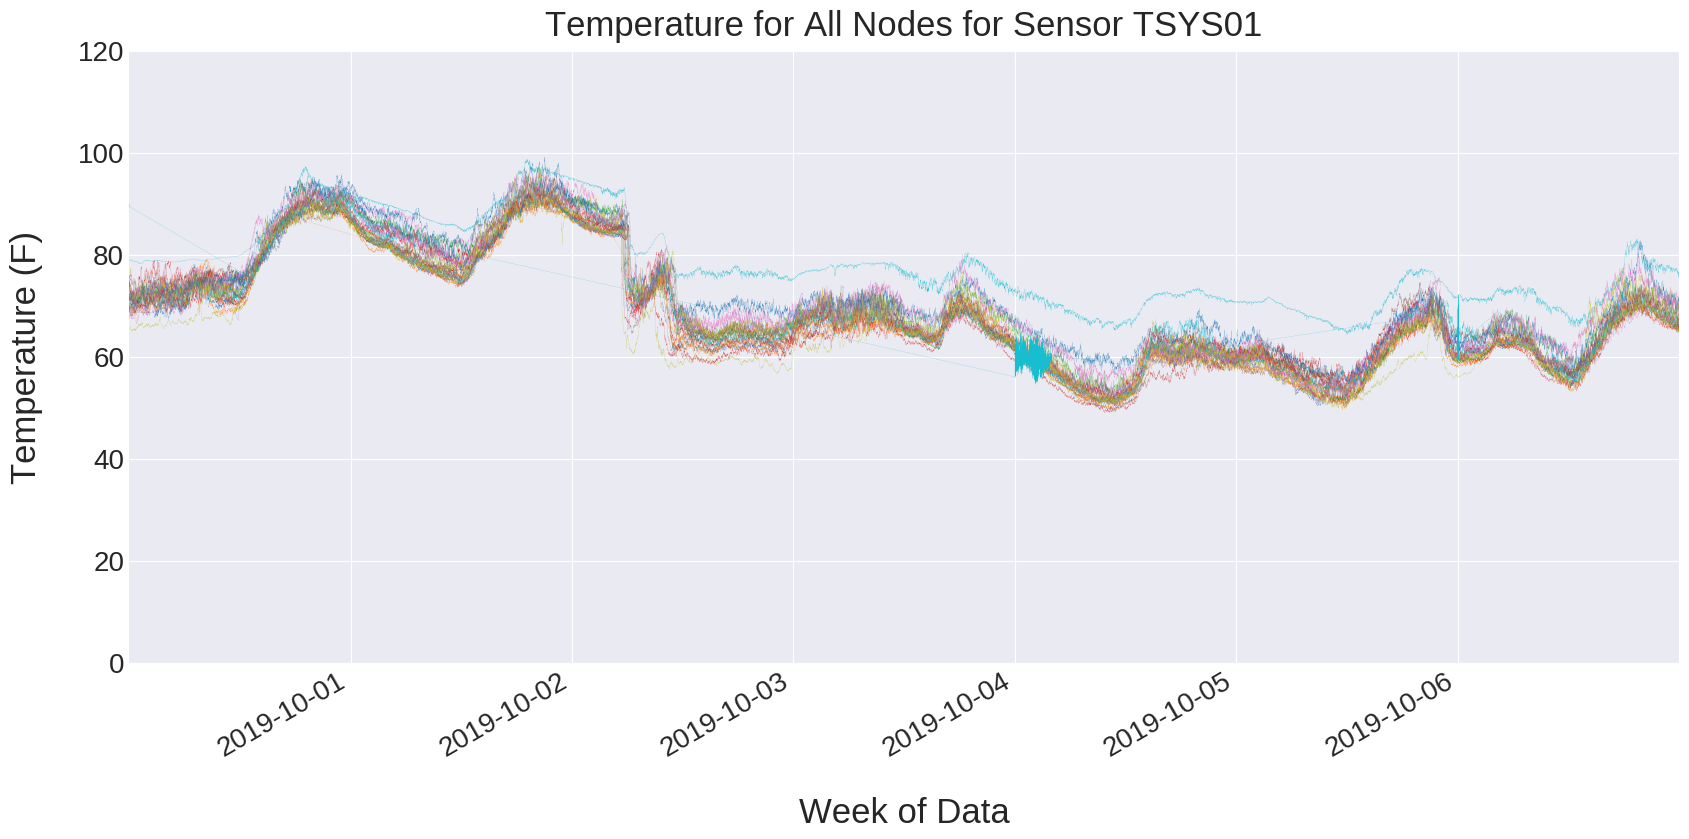

In [19]:
# Set the graphing style 
plt.style.use('seaborn-darkgrid')

#plot data as a bar chart
fig, ax = plt.subplots()

plt.xticks(fontsize = 20, rotation=60)
plt.yticks(fontsize = 20)

ax.set_ylim(0, 120)

# Set title and labels
ax.set_title('Temperature for All Nodes for Sensor TSYS01',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_ylabel('Temperature (F)',fontsize = 25, labelpad=25)
 
for nodeId, t in TSYS01.groupby('node_id'):
    t['common_temp'].plot(ax = ax, figsize=[20,9], linewidth=0.1)
    
ax.set_xlabel('Week of Data', fontsize = 25, labelpad=25)